In [1]:
import scipy, pandas
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##########################################################################
# Make some raw data. Usually this would be read from a text file
# using pandas.
##########################################################################

# This is real standard data.
raw_data = """anti-HA	ng STD
915000	2000
726000	1000
521000	500
335000	250
79200	62.5
30000	31.25
7610	15.625"""


In [3]:
##########################################################################
# Convert the raw data into lists of protein amounts and fluorescence.
##########################################################################

ng_protein_std = [float(x.split('\t')[1]) for x in raw_data.split('\n')[1:]]
fluorescence_std = [float(x.split('\t')[0]) for x in raw_data.split('\n')[1:]]

In [18]:
##########################################################################
# The curve can be fit to protein weight (ng) or molarity.
# It is simpler to use molarity because no correction factor is needed
# for comparing different samples. So we convert to molarity.
##########################################################################

MW_standard_kDa = 50  # 50 kDa standard.

# For 1 ng of a 1 kDa standard:
# 1 ng / (1 kg/mol) = 1 mol * (ng/kg) = 1 mol * 1E-12 = 1 nmol
# That is, divide ng by kDa to obtain pmols.

pmol_protein_std = [x/MW_standard_kDa for x in ng_protein_std]

In [24]:
##########################################################################
# Fit the curve.
##########################################################################

def hyperbolic(x, a, b):
    return (x*a)/(x+b)

def inverse_hyperbolic(x, a, b):
    return (-x*b)/(x-a)

def fit_curve(pmol_protein, fluorescence):

    params, pcov = scipy.optimize.curve_fit(
     hyperbolic, pmol_protein, fluorescence, p0=(50000, 100))
    
    return params

params = fit_curve(pmol_protein_std, fluorescence_std)
print(f"Parameters a={params[0]} b={params[1]}")

Parameters a=1241557.024524991 b=14.141251715776058


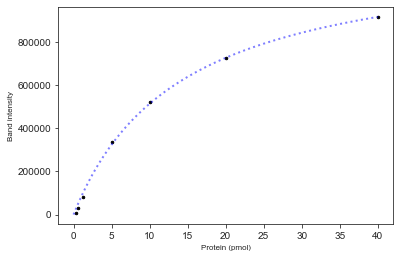

<Figure size 432x288 with 0 Axes>

In [23]:
##########################################################################
# Show the fit curve. 
##########################################################################

sns.set_style('ticks')
fig, ax = plt.subplots()

# Plot the standards.
plt.plot(pmol_protein_std, fluorescence_std, 'k.', markersize=5, alpha=1)

# Plot the fit curve.
xarr = np.linspace(0, max(pmol_protein_std), 100)
plt.plot(xarr, hyperbolic(xarr, *params), 'b:', linewidth=2, alpha=0.5)

ax.set_xlabel('Protein (pmol)', fontsize=8)
ax.set_ylabel('Band intensity', fontsize=8)

plt.show(); plt.clf()  # The fit is basically perfect.

In [25]:
##########################################################################
# Estimate the ng of some experimental samples run with the standards.
##########################################################################

experimental_fluor = [138000, 79100, 470000]

estimated_pmol_test = [inverse_hyperbolic(fluor, *params) for fluor in experimental_fluor]

print(f"Estimated pmol: {estimated_pmol_test}")

Estimated pmol: [1.768366014087116, 0.9622489151157766, 8.614254157697022]


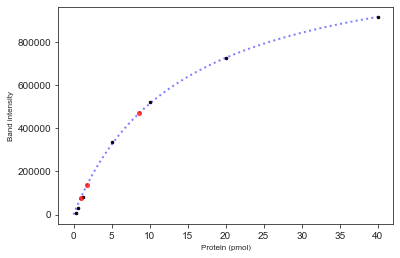

<Figure size 432x288 with 0 Axes>

In [28]:
##########################################################################
# Show the test samples in the fit curve.
##########################################################################

sns.set_style('ticks')
fig, ax = plt.subplots()

# Plot the standards.
plt.plot(pmol_protein_std, fluorescence_std, 'k.', markersize=5, alpha=1)

# Plot the fit curve.
xarr = np.linspace(0, max(pmol_protein_std), 100)
plt.plot(xarr, hyperbolic(xarr, *params), 'b:', linewidth=2, alpha=0.5)

# Plot the experimental samples.
plt.plot(estimated_pmol_test, experimental_fluor, 'r.', markersize=8, alpha=0.7)

ax.set_xlabel('Protein (pmol)', fontsize=8)
ax.set_ylabel('Band intensity', fontsize=8)

plt.show(); plt.clf()